<a href="https://colab.research.google.com/github/hrtywhy/Machine-Learning/blob/main/Naive-Baiyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
UDPLag = pd.read_csv ('/content/drive/My Drive/Dataset/skripsi/2/UDPLag.csv')
Syn = pd.read_csv ('/content/drive/My Drive/Dataset/skripsi/2/Syn.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.concat([Syn, UDPLag], ignore_index = True)

In [5]:
data.shape

(1953286, 88)

In [6]:
data[' Label'].value_counts()

Syn        1582289
UDP-lag     366461
BENIGN        4097
WebDDoS        439
Name:  Label, dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [8]:
data_real = data.replace(np.inf, np.nan)

In [9]:
data_real.isnull().sum().sum()

477440

In [10]:
data_df = data_real.dropna(axis=0)

In [11]:
data_df.isnull().sum().sum()

0

In [12]:
data_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,172.16.0.5-192.168.50.1-60489-27808-6,172.16.0.5,60489,192.168.50.1,27808,6,2018-12-01 13:30:30.739595,1,2,0,0

In [13]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [14]:
data_X.columns 

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [15]:
data_X.shape 

(1714566, 86)

In [16]:
data_y = data_df[' Label']

In [17]:
data_y.shape 

(1714566,)

In [18]:
data_df.isnull().sum().sum()

0

In [19]:
data_y.unique()

array(['Syn', 'BENIGN', 'UDP-lag', 'WebDDoS'], dtype=object)

In [20]:
data_X 

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,172.16.0.5-192.168.50.1-60489-27808-6,172.16.0.5,60489,192.168.50.1,27808,6,2018-1

In [21]:
from sklearn.preprocessing import LabelEncoder 

In [22]:
le = LabelEncoder()

In [23]:
data_y_trans = le.fit_transform(data_y)

In [24]:
data_y_trans

array([1, 1, 1, ..., 2, 2, 2])

In [25]:
le_fid = LabelEncoder()

In [26]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [27]:
le_SIP = LabelEncoder()

In [28]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [29]:
le_DIP = LabelEncoder()

In [30]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [31]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [32]:
data_X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,281052,1039535,7,53058,57,53058,6,334198,115799309,19,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.813482e-01,5.789965e+06,7.370247e+06,21714933.0,0.0,115799309.0,6.433295e+06,7.505277e+06,21714933.0,0.0,48.0,48.0,0.0,48.0,48.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,380,0,0,0,0,0,0,19,0,2,0,5840,0,0,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,450424,520499,7,32237,57,32237,6,334199,113973933,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.403830e-01,7.598262e+06,8.575157e+06,20019405.0,0.0,113973933.0,7.598262e+06,8.575157e+06,20019405.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,182979,1241636,7,60495,57,9840,6,334200,112,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.571429e+04,3.733333e+01,6.379916e+01,111.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,2,0,5840,0,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,41540,1219246,7,59724,57,59724,6,334201,105985004,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.509648e-01,7.065667e+06,8.074003e+06,20954123.0,1.0,105985004.0,7.065667e+06,8.074003e+06,20954123.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,320,0,0,0,0,0,0,16,0,0,0,5840,-1,0,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,358711,1241654,7,60496,57,32538,6,334202,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,236819,1241302,7,60489,57,27808,6,334193,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,40,0,0,0,0,0,0,2,0,0,0,5840,-1,0,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
1953281,350624,1241360,7,60490,57,14102,6,334194,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [33]:
data_X.dtypes

Unnamed: 0           int64
Flow ID              int64
 Source IP           int64
 Source Port         int64
 Destination IP      int64
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
 Inbound             int64
Length: 86, dtype: object

In [34]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [35]:
model.feature_importances_

array([9.54175609e-02, 1.17610455e-02, 2.02067304e-03, 1.20076033e-02,
       1.03706952e-03, 1.02502007e-02, 1.94204230e-02, 6.29753096e-01,
       2.47439436e-02, 8.15022525e-03, 2.74275600e-04, 1.81691464e-03,
       9.02409460e-05, 5.68516123e-03, 5.58503227e-03, 5.54544526e-03,
       9.34366782e-04, 1.26964058e-04, 1.16317671e-04, 1.28788939e-04,
       1.09437890e-04, 2.79371736e-03, 2.67648325e-03, 4.14764305e-03,
       5.83811263e-03, 3.87343206e-03, 5.28659782e-04, 2.50433306e-02,
       7.22853461e-03, 2.45106689e-03, 7.84511023e-03, 3.47372752e-04,
       4.59315295e-04, 3.01141885e-04, 1.55803744e-04, 4.46509002e-04,
       2.16121994e-04, 1.05610015e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.88302064e-03, 3.77405091e-04, 3.09504003e-03,
       9.35458070e-04, 8.40910652e-03, 3.68036525e-03, 1.13675224e-02,
       9.63318521e-05, 6.25899861e-05, 0.00000000e+00, 4.69985104e-05,
       1.41295243e-04, 0.00000000e+00, 1.88193715e-02, 7.69627317e-04,
      

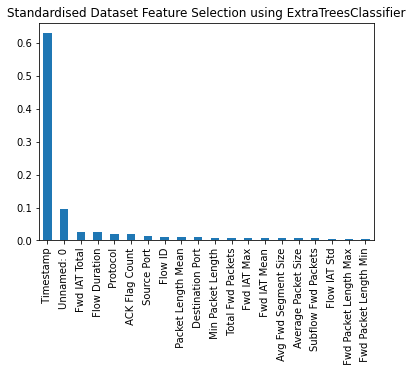

In [36]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [37]:
data_X.shape 

(1714566, 86)

In [38]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [39]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,334198,53058,0.0,0.0,1039535,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.640770e-01,1.813482e-01,0.0,0,53058,0
1,334199,32237,0.0,0.0,520499,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.403830e-01,1.403830e-01,0.0,0,32237,0
2,334200,60495,0.0,0.0,1241636,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.785714e+04,3.571429e+04,0.0,0,9840,0
3,334201,59724,0.0,0.0,1219246,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.509648e-01,1.509648e-01,0.0,0,59724,0
4,334202,60496,0.0,0.0,1241654,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,32538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953280,334193,60489,0.0,0.0,1241302,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,27808,0
1953281,334194,60490,0.0,0.0,1241360,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,14102,0
1953282,334195,60491,0.0,0.0,1241439,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,2.000000e+06,2.000000e+06,0.0,0,58360,0
1953283,334196,60492,0.0,0.0,1241462,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,6,1.000000e+06,1.000000e+06,0.0,0,2905,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [41]:
X_train.shape 

(1200196, 86)

In [42]:
X_test.shape 

(514370, 86)

In [43]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [44]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [45]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [46]:
X_train_std_20.shape 

(1200196, 20)

In [47]:
y_train_20.shape

(1200196,)

In [48]:
X_test_std_20.shape 

(514370, 20)

In [49]:
y_test_20.shape 

(514370,)

Change Algo

In [50]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [51]:
from sklearn.naive_bayes import GaussianNB 

In [52]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [53]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

      BENIGN       0.69      0.87      0.77      1197
         Syn       0.83      1.00      0.91    413754
     UDP-lag       0.98      0.15      0.26     99286
     WebDDoS       0.00      0.00      0.00       133

    accuracy                           0.83    514370
   macro avg       0.63      0.50      0.48    514370
weighted avg       0.86      0.83      0.78    514370



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[  1042     66     89      0]
 [   205 413480     69      0]
 [   224  84500  14562      0]
 [    46      9     78      0]]


In [55]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 83.41932849894044
